In [59]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.patches as mpatches

In [2]:
#load combined file from ADV processing code
os.chdir("ADV_8032017/")
filename ="combined.csv"
df = pd.read_csv(filename)

In [44]:
start_time1, end_time1 = (1231, 1245) #select start and end time of in kelp run 
t1=end_time1-start_time1 #time in minutes for the index set
start_time2, end_time2 = (1305, 1312)#select start and end time of out of bed run 
t2 = end_time2-start_time2
df['Time']= (df['Hour']*100)+ (df['Minute']) #make new time column for indexing in military time
runindex1 = (df['Time']>start_time1-1) & (df['Time']<end_time1+1) # index by start and end time for in bed run
runindex2 = (df['Time']>start_time2-1) & (df['Time']<end_time2+1) # index by start and end time for out of bed run

In [45]:
#make variables you want to play with 
velocityN_in = df['Velocity_North(m/s)'][runindex1]
velocityN_out = df['Velocity_North(m/s)'][runindex2]
N1 = len(velocityN_in)
N2 = len(velocityN_out)

<IPython.core.display.Javascript object>


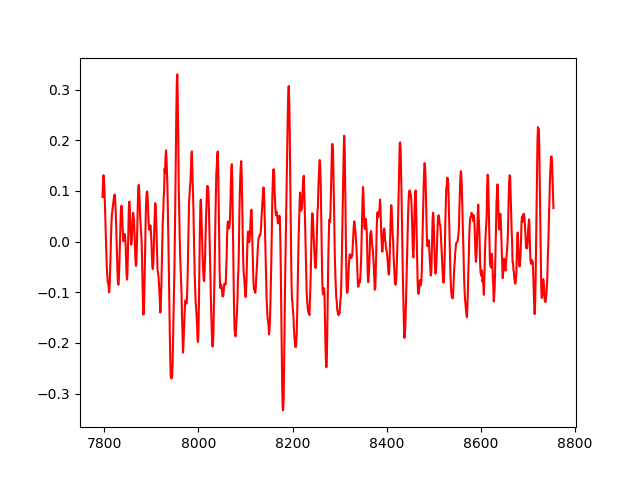

In [46]:
plt.figure()
#plt.plot(velocityN_in)
plt.plot(velocityN_out, 'r')
#plt.plot(df['Velocity_North(m/s)'])
plt.show()

In [47]:
velocityN_fft_in = np.fft.fft(velocityN_in) #Fast Fourier Transform alogorithm
velocityN_fft_out = np.fft.fft(velocityN_out)

<IPython.core.display.Javascript object>


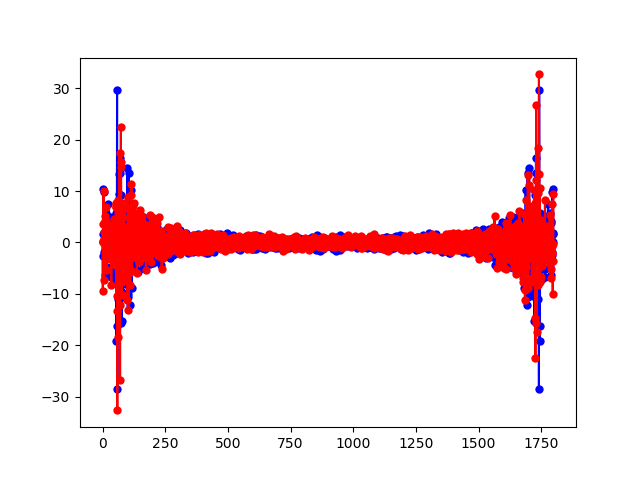

In [32]:
plt.figure()
plt.plot(np.real(velocityN_fft_in),'b-o',markeredgecolor='none')
plt.plot(np.imag(velocityN_fft_in),'r-o',markeredgecolor='none')
plt.show()

In [53]:
deltat1 = 1/t1  
deltat2 = 1/t2
f_in = np.fft.fftfreq(N1,deltat1)
S_in = (2/N1)*deltat1*np.abs(velocityN_fft_in)**2
f_out = np.fft.fftfreq(N2, deltat2)
S_out = (2/N2)*deltat2*np.abs(velocityN_fft_out)**2

<IPython.core.display.Javascript object>


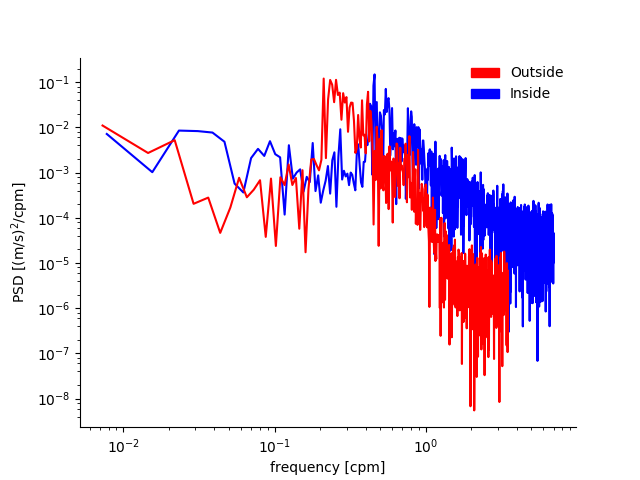

In [68]:
fig, ax = plt.subplots()

plt.loglog(f_in[0:round(N1/2)],S_in[0:round(N1/2)], 'b')
plt.loglog(f_out[0:round(N2/2)],S_out[0:round(N2/2)], 'r')
plt.xlabel('frequency [cpm]')
plt.ylabel('PSD [(m/s)$^2$/cpm]') #power spectral density 
red_patch = mpatches.Patch(color='red', label='Outside')
blue_patch = mpatches.Patch(color='blue', label='Inside')
plt.legend(loc = 1,bbox_to_anchor=(1, 1.01), handles=[red_patch, blue_patch], frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()